![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 003 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

> answers by:
> - matthew koton

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 28/05/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0003Part002.ipynb)

In [15]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import fetch_openml, load_breast_cancer, load_digits, load_iris, load_wine

# Computer Vision

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [16]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [17]:
# Constants

DATA_FILE_URL   = r'None'
DATA_FILE_NAME  = r'None'

T_MNIST_IMG_SIZE = (28, 28)

TOTAL_RUN_TIME = 30 #<! Don't touch it!


In [18]:
# Auxiliary Functions

def BalancedSubSample( dfX: pd.DataFrame, colName: str, numSamples: int ):

    # TODO: Validate the number of samples
    # TODO: Validate the column name (Existence and categorical values)

    # Validate the column name
    if colName not in dfX.columns:
        raise ValueError(f"Column name {colName} not found in DataFrame.")

    # Validate the number of samples
    unique_counts = dfX[colName].value_counts()
    if any(unique_counts < numSamples):
        raise ValueError(f"Number of samples {numSamples} is too high for some categories.")

    return dfX.groupby(colName, as_index=False, group_keys=False).apply(lambda dfS: dfS.sample(numSamples, replace=False))

## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Don't use `pip install` on the submitted notebook!  
   If you need a package that is not imported make it clear by a comment.
 - Good Luck!

<font color='red'>Total run time must be **less than `TOTAL_RUN_TIME` seconds**</font>.

In [19]:
# Run Time
print(f'The total run time must not exceed: {TOTAL_RUN_TIME} [Sec]')
startTime = time.time()

The total run time must not exceed: 30 [Sec]


* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.
* <font color='brown'>(**#**)</font> The total run time of this notebook must be **lower than 60 [Sec]**.

In [20]:
# Students Packages to Import
# If you need a package not listed above, use this cell
# Do not use `pip install` in the submitted notebook



## Generate / Load Data

In [21]:
# Download Data
# This section downloads data from the given URL if needed.

if (DATA_FILE_NAME != 'None') and (not os.path.exists(DATA_FILE_NAME)):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

## 3. PCA

### 3.1. PCA Algorithm

In this section we'll implement a SciKit Learn API compatible class for the PCA.  
The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
2. `fit()` - Given a data set builds the encoder / decoder.  
3. `transform()` - Applies the encoding on the input data.  
4. `inverse_transform()` - Applies the decoding on the input data.  

* <font color='brown'>(**#**)</font> You may use the [SciKit Learn's PCA module](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) as a reference.
* <font color='brown'>(**#**)</font> Both encoding and decoding applied as out of sample encoding / decoding.
* <font color='brown'>(**#**)</font> Pay attention to data structure (`N x D`).


In [22]:
class PCA:
    def __init__(self, d: int = 2):
        '''
        Constructing the object.
        Args:
            d - Number of dimensions of the encoder output.
        '''
        #===========================Fill This===========================#
        # 1. Keep the model parameters.

        self.d = d
        self.mUd = None
        self.vMean = None
        #===============================================================#

    def fit(self, mX: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mX - Input data with shape N x D.
        Output:
            self
        '''
        #===========================Fill This===========================#
        # 1. Build the model encoder.
        # 2. Build the model decoder.
        # 3. Optimize calculation by the dimensions of `mX`.
        # !! You may find `scipy.sparse.linalg.svds()` useful.
        # !! You may find `scipy.sparse.linalg.eigsh()` useful.

        self.vMean = np.mean(mX, axis=0)
        mX_centered = mX - self.vMean

        # Using Singular Value Decomposition
        u, s, vh = sp.sparse.linalg.svds(mX_centered, k=self.d)

        self.mUd = vh.T
        #===============================================================#

        return self

    def transform(self, mX: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) encoding
        Args:
            mX - Input data with shape N x D.
        Output:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model encoder.
        # return (mX - np.atleast_1d(self.vMean)) @ self.mUd

        mZ = (mX - np.atleast_1d(self.vMean)) @ self.mUd
        #===============================================================#

        return mZ

    def inverse_transform(self, mZ: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) decoding
        Args:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        Output:
            mX - Reconstructed data with shape N x D.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model decoder.
        # return (mZ @ self.mUd.T) + np.atleast_1d(self.vMean)

        mX = (mZ @ self.mUd.T) + np.atleast_1d(self.vMean)
        #===============================================================#

        return mX


* <font color='red'>(**?**)</font> In the class we use _out of sample_ encoding / decoding. What if we use the same `mX` for training and the encoding?  
Make sure to understand this before proceeding.

When you use the same data `mX` for both training the PCA model and then encoding/decoding, you are essentially performing in-sample encoding and decoding. In this case, the PCA model should be able to represent the data well, since the principal components are derived from the same dataset. The transformation to the lower-dimensional space and the inverse transformation back to the original space should be quite accurate, capturing the most significant features of the data.

The same `mUd` and `vMean` would be used for encoding and decoding in both scenarios. The principal difference is in how well these learned parameters generalize to new data.

### 3.2. PCA Application

In this section the PCA (Using the above class) will be applied on several data sets:

 * Breast Cancer Dataset - Loaded using `load_breast_cancer()`.
 * Digits Dataset - Loaded using `load_digits()`.
 * Iris Dataset - Loaded using `load_iris()`.
 * Wine Dataset - Loaded using `load_wine()`.

For each data set:

1. Make yourself familiar with the data set:
    * How many features are there ($D$).
    * How many samples are there ($N$).
    * Do all features have the same unit?
2. Apply a Pre Process Step  
   In ML, usually, if the features do not have the same unit they are normalized.  
   Namely, make each feature with zero mean and unit standard deviation.   
   Write a function to normalize input data.
3. Apply the PCA  
   Set `d` to be visualization friendly and apply PCA from $D$ to $d$.  
   The obtained the low dimensional data represents $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$.
4. Plot Low Dimensional Data  
   Make a scatter plot of $\boldsymbol{Z} \in \mathbb{R}^{d \times N}$ and color the data points according to the data labels.  
   For each data set show result with the normalization step and without it.
5. Calculate Lost Energy  
   For each plot, show the value of ${\left\| \tilde{\boldsymbol{X}} - \boldsymbol{X} \right\|}_{F}^{2}$.  
   Do this by applying `inverse_transform()` on the low dimensional data and calculate the norm.


* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> The output should be plots figures for each data set. Show them in a single figure using sub plots.

In [23]:
#===========================Fill This===========================#
# 1. Implement the normalization function.
# !! Make sure to address the remark.

def NormalizeData(mX: np.ndarray) -> np.ndarray:
    '''
    Normalize data so each feature has zero mean and unit standard deviation.
    Args:
        mX  - Input data with shape N x d.
    Output:
        mY  - Output data with shape N x d.
    Remarks:
        - Features with zero standard deviation are not scaled (Only centered).
    '''

    mean = np.mean(mX, axis=0)
    std = np.std(mX, axis=0)
    std[std == 0] = 1  # If standard deviation is zero, don't scale

    mY = (mX - mean) / std

    return mY
#===============================================================#

Breast Cancer Dataset: 569 samples, 30 features
Digits Dataset: 1797 samples, 64 features
Iris Dataset: 150 samples, 4 features
Wine Dataset: 178 samples, 13 features


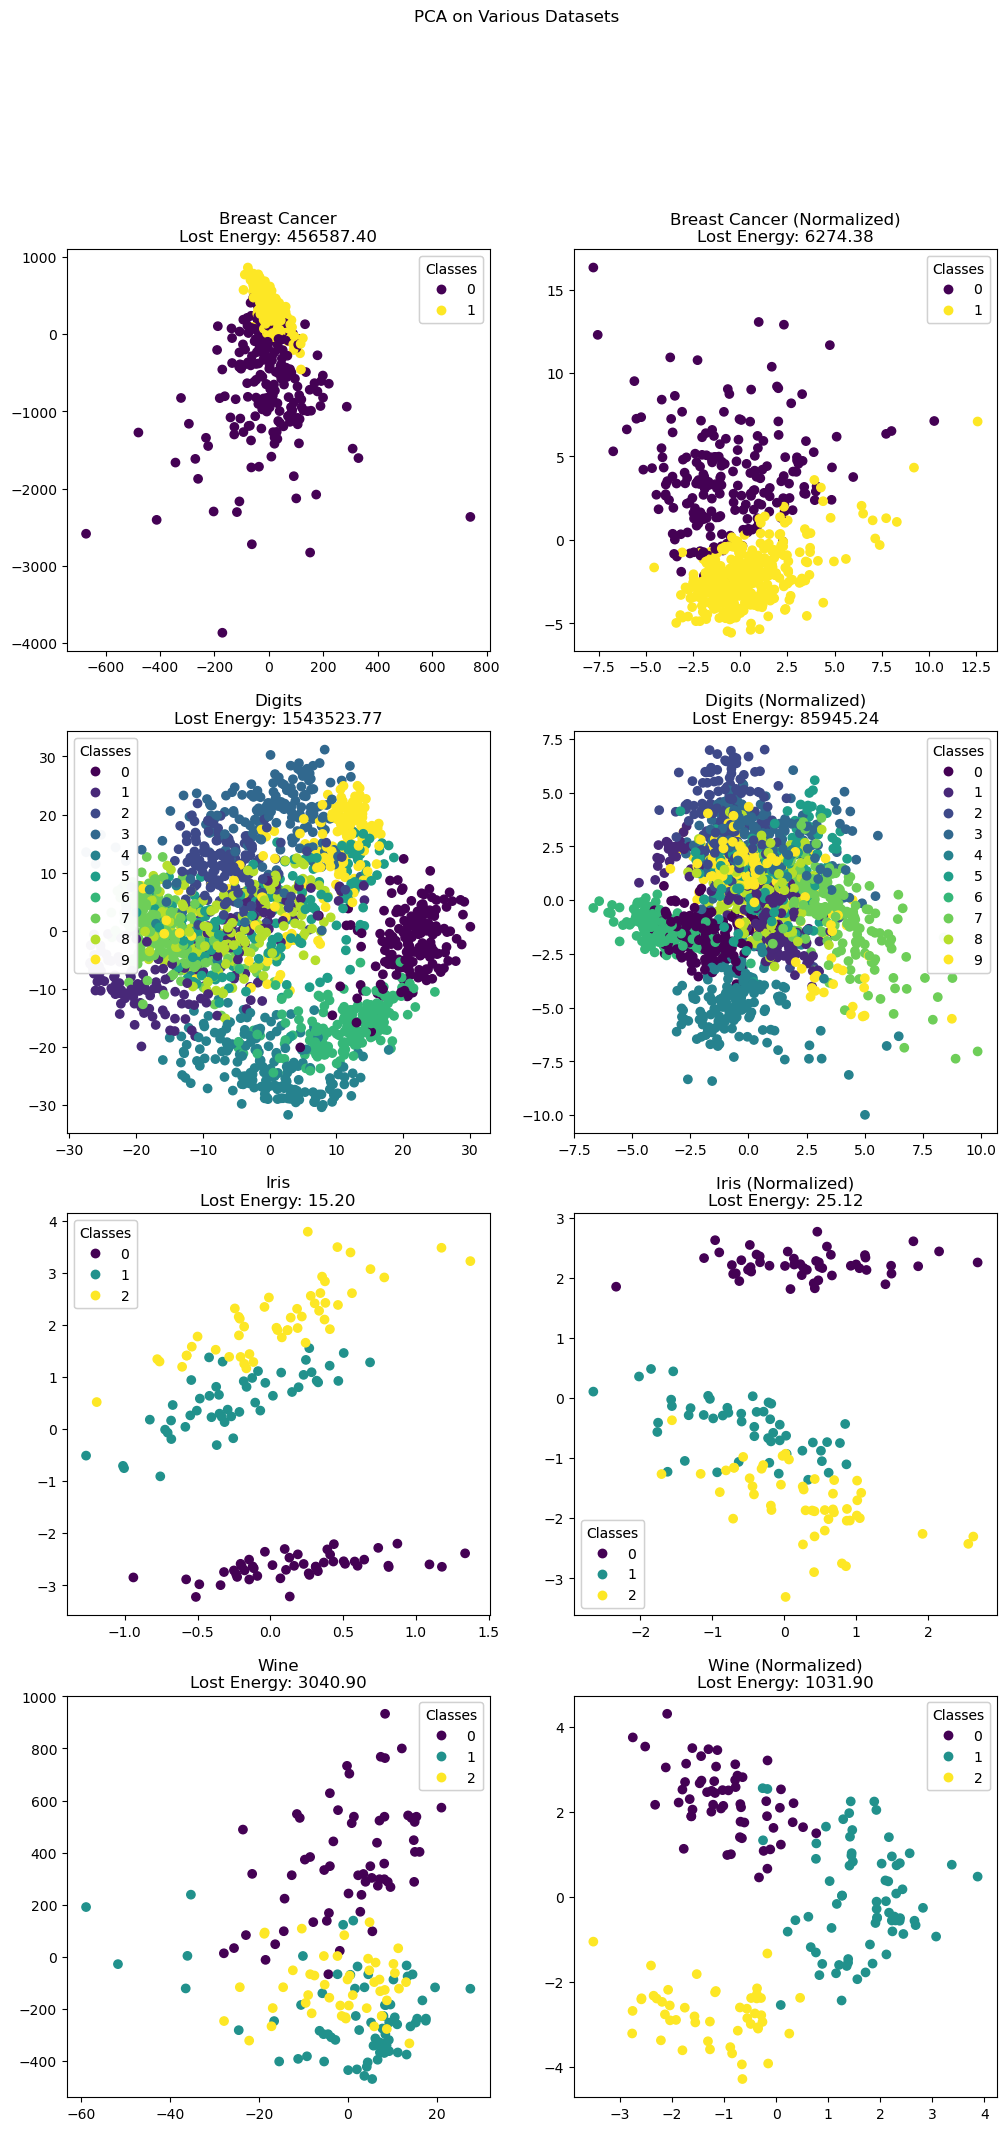

In [24]:
#===========================Fill This===========================#
# 1. Set parameter `d`.
# 2. Load each data set.
# 3. Apply PCA to each data set with and without normalization.
# 4. Display results as scatter data.
# !! The figure should be 2 x numDataSets.

# Set parameter `d` for visualization
d = 2

# Load datasets
datasets = {
    "Breast Cancer": load_breast_cancer(),
    "Digits": load_digits(),
    "Iris": load_iris(),
    "Wine": load_wine()
}

# Create subplots
fig, axes = plt.subplots(len(datasets), 2, figsize=(12, 24))
fig.suptitle('PCA on Various Datasets')

for i, (name, dataset) in enumerate(datasets.items()):
    mX = dataset.data
    vY = dataset.target

    # Show dataset info
    print(f"{name} Dataset: {mX.shape[0]} samples, {mX.shape[1]} features")

    for j, normalize in enumerate([False, True]):
        mX_processed = NormalizeData(mX) if normalize else mX

        # Apply PCA
        pca = PCA(d=d)
        pca.fit(mX_processed)
        mZ = pca.transform(mX_processed)

        # Calculate lost energy
        mX_reconstructed = pca.inverse_transform(mZ)
        lost_energy = np.linalg.norm(mX_reconstructed - mX_processed, 'fro')**2

        # Scatter plot
        ax = axes[i, j]
        scatter = ax.scatter(mZ[:, 0], mZ[:, 1], c=vY, cmap='viridis')
        legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
        ax.add_artist(legend1)
        ax.set_title(f"{name}{' (Normalized)' if normalize else ''}\nLost Energy: {lost_energy:.2f}")

plt.show()

#===============================================================#

### 3.3. Question

In the above, why does the results of the normalized and non normalized data are different?  
Address the geometry of the results and the value of the reconstruction error.

### <font color='red'> 3.3. Solution </font>

The difference between the results for normalized and non-normalized data in PCA comes down to the underlying geometry of the data and the concept of variance, which PCA aims to maximize.

\\

**Geometry of Results:**

1. Non-Normalized Data: When the features are not normalized, their scales can vary widely. In such cases, PCA may become biased towards the features with larger scales (and hence larger variances). For example, a feature measured in hundreds or thousands will dominate over a feature measured in units or tenths. This causes the principal components to be aligned in a way that may not capture the underlying structure of the data effectively.

2. Normalized Data: When the data is normalized, each feature contributes equally to the distance metric. This allows PCA to find the directions that maximize the variance without being biased by the original scale of the features. The geometry of the lower-dimensional representation usually becomes more meaningful after normalization.

\\

**Reconstruction Error:**

1. Non-Normalized Data: The reconstruction error may be low but misleading. Even though the principal components capture most of the variance, they may only be capturing the variance of the features with larger scales, thus ignoring potentially informative features with smaller scales.

2. Normalized Data: The reconstruction error in this case is often a better representation of how well the principal components capture the underlying structure of the data. Normalizing the data ensures that each feature contributes equally to the variance, making the reconstruction error a more balanced metric.

\\

**In the Context of the Plots:**

The scatter plots of the normalized data look more "clustered" by class than those of the non-normalized data, it would suggest that normalizing the data allowed PCA to capture the features that are more relevant for distinguishing between the classes.

Similarly, the lost energy (reconstruction error) is mostly lower for normalized data, it indicates that the principal components are capturing more of the "true" underlying structure of the data, as opposed to being biased by the scale of the features.

\\

In summary, normalization removes the scale bias and allows PCA to capture the most "informative" variance in the data, resulting in a lower-dimensional representation that is often more meaningful and a reconstruction error that is often more informative.

---

## 4. Image Denoising

In this section the PCA algorithm will be used for denoising images from the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database).  
In this section:

 1. Load Data  
    Load the MNIST data set and sub sample it.  
    We'll have a perfectly balanced data set.
    The data will be in `mX` and labels in `vY`.  
    This is already implemented.
 2. Add Noise  
    We'll add noise to the data.  
    The noise of the data will be modeled as a Poisson Noise (Also known as [_Shot Noise_](https://en.wikipedia.org/wiki/Shot_noise)).  
    The _Shot Noise_ is a classic model of noise gathered by imaging sensors.  
    This is already implemented.
 3. Analyze the Data  
    Analyze the spectrum of the data and choose an appropriate ste of parameters for denoising.
 3. Apply Denoising  
    Apply denoising by utilizing the PCA algorithm.
 4. Analyze Result  
    Show the results as a function of the parameters.

In [25]:
# Parameters
numSamplesClass = 600
λ               = 35

In [26]:
# Load Data
# If you get SSL error, uncomment the following 2 lines
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dfX, dfY = fetch_openml(name = 'mnist_784', version = 1, return_X_y = True, as_frame = True, parser = 'auto')


In [27]:
# Sub Sample Data
dfData = pd.concat((dfX, dfY), axis = 1)

# Balanced Sub Sample
# End Result: 'numSamplesClass' samples per digit
dfData = BalancedSubSample(dfData, 'class', numSamplesClass)
vY = dfData['class'].to_numpy(dtype = np.uint8)
mX = dfData.drop(columns = ['class']).to_numpy()

In [28]:
# Add Poisson Noise
mN = np.random.poisson(λ, size = mX.shape) #<! Noise samples

In [29]:
# Add Noise
# Make sure values are in {0, 1, 2, ..., 255} range
mXRef = mX.copy() #<! Reference with no noise
mXRef = mXRef / 255

mX += mN
mX = np.minimum(mX, 255)


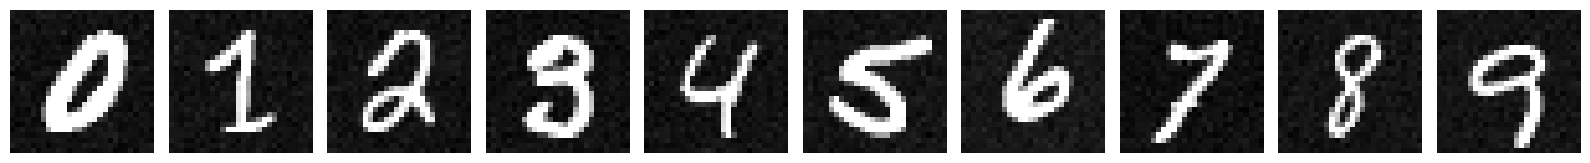

In [30]:
# Show Samples

lIdx = [np.flatnonzero(vY == ii)[0] for ii in range(10)]

_, mHA = plt.subplots(1, 10, figsize = (16, 4))
for ii, hA in enumerate(mHA.flat):
    idx = lIdx[ii]
    mI  = np.reshape(mX[idx], T_MNIST_IMG_SIZE)
    # mI  = np.clip(mI, 0, 1)
    hA.imshow(mI, cmap = 'gray')
    hA.axis('off')

plt.tight_layout()
plt.show()

### 4.1. The Data Spectrum

In this section:

 1. Pre Process the data (Optional).  
    Do this step if you think it is needed.
 2. Plot the Spectrum of the Eigen Values of the data.
 3. Choose **a range** (5 values) of `d` for the low dimensionality reduction.
 4. For each `d` value, calculate the **relative energy loss**.


In [31]:
#===========================Fill This===========================#
# 1. Pre Process Data (Optional).
# !! Make sure to keep the name of the data `mX`.
# !! Don't change the order of the data so it matches `vY`.

mX = mX / 255.0  # Normalize to [0,1]

#===============================================================#

In [32]:
#===========================Fill This===========================#
# 1. Calculate the spectrum of the Eigen Values of the data.

# Calculate the spectrum of the Eigenvalues
# Using the covariance matrix for the Eigen decomposition
mX_centered = mX - np.mean(mX, axis=0)
cov_matrix = np.cov(mX_centered, rowvar=False)
eigenvalues, _ = np.linalg.eigh(cov_matrix)

# Sort Eigenvalues in descending order
eigenvalues = np.flip(np.sort(eigenvalues))

#===============================================================#

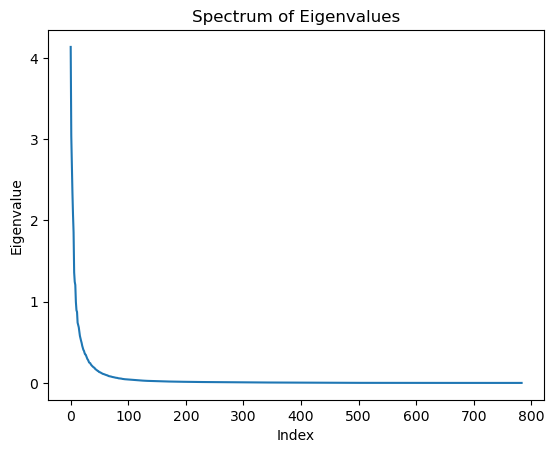

In [33]:
#===========================Fill This===========================#
# 1. Display the Spectrum.
# !! You may show both the spectrum and the relative energy.

# Plot the spectrum of Eigenvalues
plt.figure()
plt.plot(eigenvalues)
plt.title('Spectrum of Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()

#===============================================================#

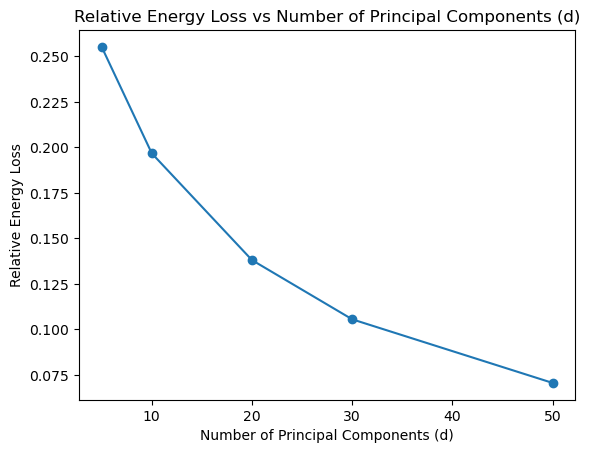

In [34]:
#===========================Fill This===========================#
# 1. Choose a range of `d` values.
# 2. Per `d` plot / display the relative energy loss.
# !! Don't choose too many, keep running time and visualization reasonable.
# !! The choice should be in order to show the effect of `d` on the results and not only the optimal `d`.

# Choose a range of `d` values and calculate relative energy loss
d_values = [5, 10, 20, 30, 50] # Chosen based on the Eigenvalue spectrum and the problem requirements
relative_energy_losses = []

for d in d_values:
    pca = PCA(d=d)
    pca.fit(mX)
    mZ = pca.transform(mX)

    # Reconstruct the data and calculate the relative energy loss
    mX_reconstructed = pca.inverse_transform(mZ)
    energy_loss = np.linalg.norm(mX_reconstructed - mX, 'fro')**2
    total_energy = np.linalg.norm(mX, 'fro')**2
    relative_energy_loss = energy_loss / total_energy

    relative_energy_losses.append(relative_energy_loss)

# Display the relative energy loss for different `d` values
plt.figure()
plt.plot(d_values, relative_energy_losses, marker='o')
plt.title('Relative Energy Loss vs Number of Principal Components (d)')
plt.xlabel('Number of Principal Components (d)')
plt.ylabel('Relative Energy Loss')
plt.show()

#===============================================================#

### 4.2. PCA Based Denoising

In this section, per `d` value:

 1. Build the _Encoder_ and _Decoder_.
 2. Denoise the images listed in the index list `lIdx`.
 3. Show results per `d`
      * For each image show the reconstruction error vs. the noisy sample (`mX`).
      * For each image show the estimation error vs. the non noisy sample (`mXRef`).

* <font color='brown'>(**#**)</font> Make sure when you use the whole data (`mX`) and when the sub set to analyze.
* <font color='brown'>(**#**)</font> For the PCA you may only use `mX`.
* <font color='brown'>(**#**)</font> The output should be the 10 images per row where the number of rows is the number of `d` values + 2 (For the reference / noisy images).

In [35]:
#===========================Fill This===========================#
# 1. Build the encoder / decoder using the `PCA` class above.
# 2. Per `d` denoise the images in `lIdx`.
# !! Only use `mX` for the PCA step.

# Initialize variables to store reconstruction and estimation errors
reconstruction_errors = []
estimation_errors = []

# Denoise images for each d value
denoised_images = {}  # To store denoised images for each d
for d in d_values:
    # Build the encoder/decoder
    pca = PCA(d=d)
    pca.fit(mX)

    # Denoise the images
    mZ = pca.transform(mX)
    mX_denoised = pca.inverse_transform(mZ)

    # Store the denoised images for this d value
    denoised_images[d] = mX_denoised

    # Calculate and store the reconstruction and estimation errors
    reconstruction_errors.append(np.linalg.norm(mX_denoised[lIdx] - mX[lIdx], axis=1))
    estimation_errors.append(np.linalg.norm(mX_denoised[lIdx] - mXRef[lIdx], axis=1))

#===============================================================#

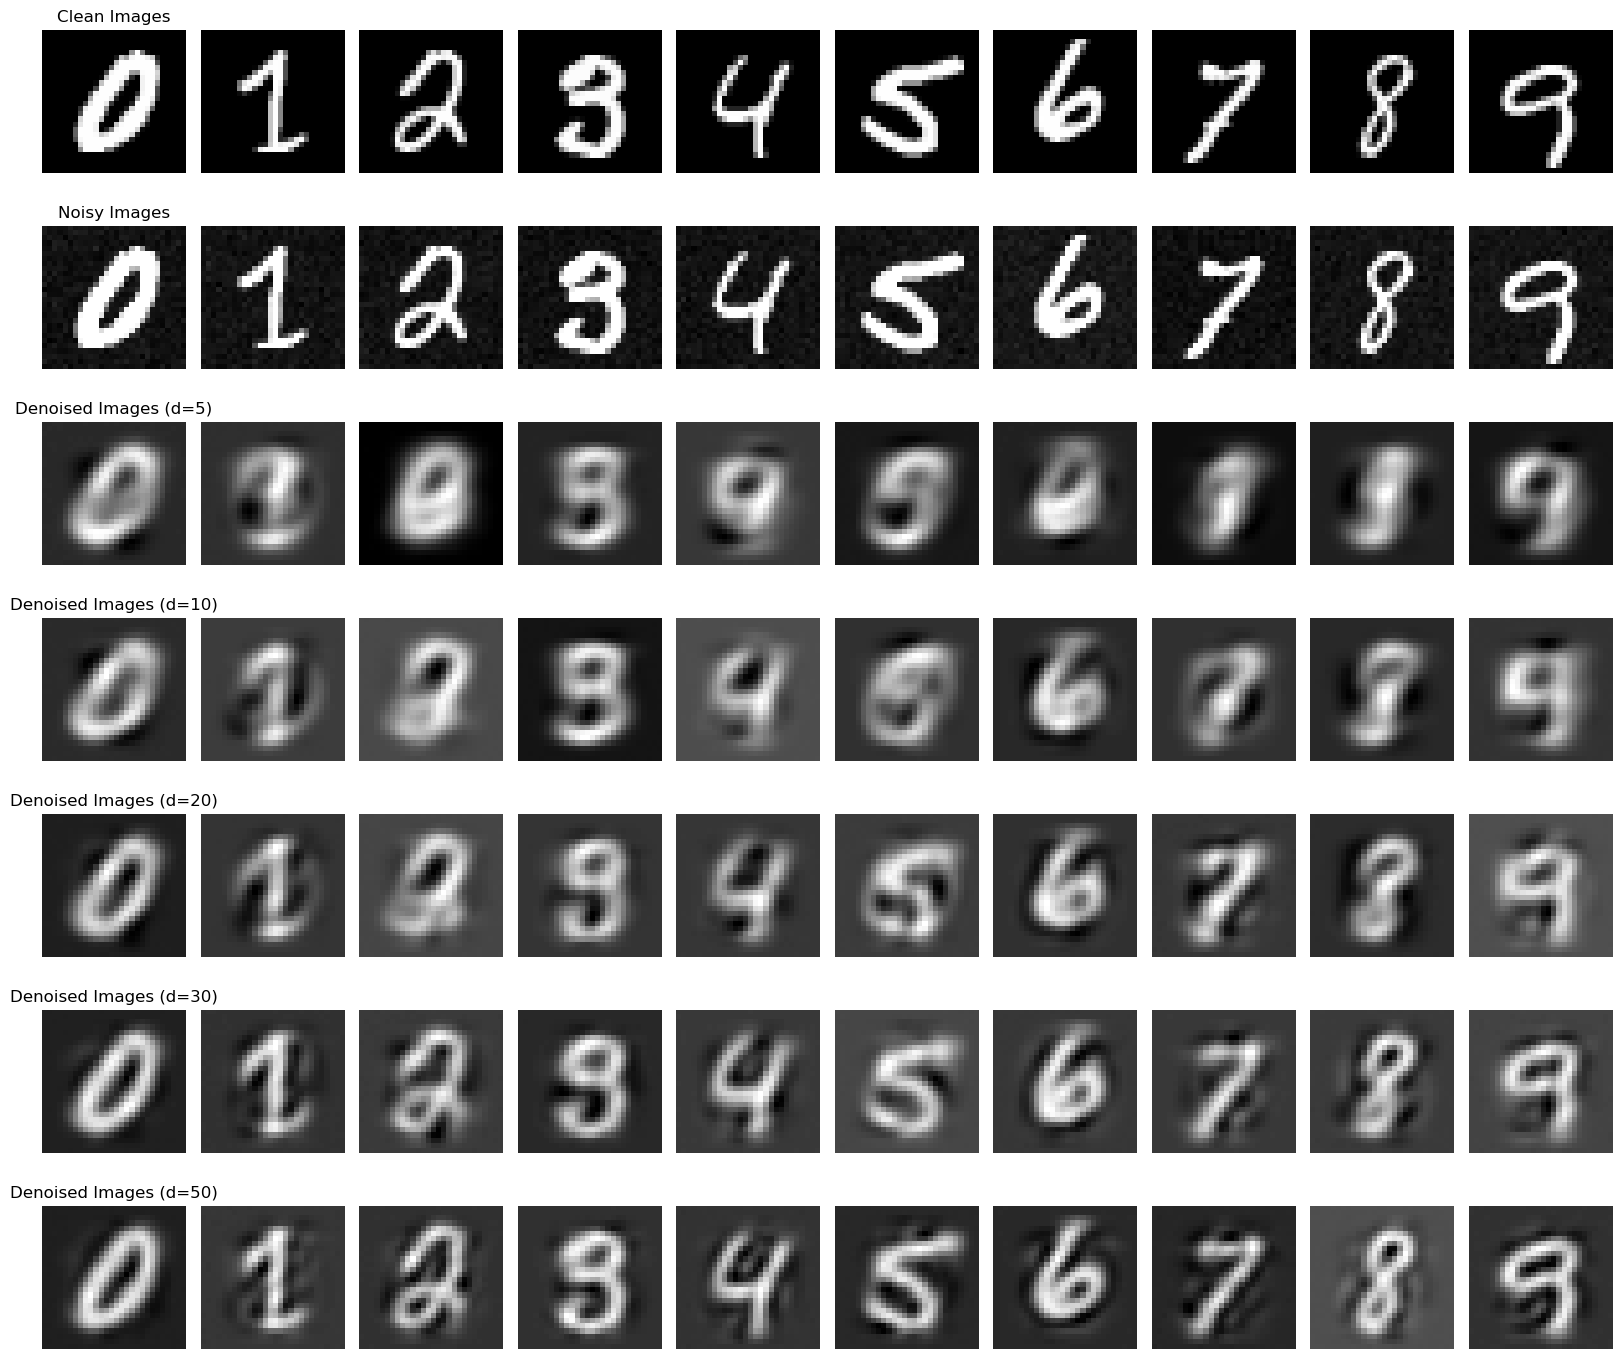

In [36]:
#===========================Fill This===========================#
# 1. Create a subplot of `len(d) + 2 x 10` plots.
# 2. In the 1st row, show the clean images (`mXRef`).
# 3. In the 2nd row, show the noisy images (`mX`).
# 4. In the next rows show the sample per different `d`.
#    Per row, show `d`.

# Initialize the figure for displaying images
fig, axes = plt.subplots(len(d_values) + 2, 10, figsize=(16, (len(d_values) + 2) * 2))

# Display the original clean images
for idx, ax in enumerate(axes[0]):
    img_idx = lIdx[idx]
    img = np.reshape(mXRef[img_idx], T_MNIST_IMG_SIZE)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
axes[0, 0].set_title("Clean Images")

# Display the noisy images
for idx, ax in enumerate(axes[1]):
    img_idx = lIdx[idx]
    img = np.reshape(mX[img_idx], T_MNIST_IMG_SIZE)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
axes[1, 0].set_title("Noisy Images")

# Display the denoised images
for i, d in enumerate(d_values):
    for idx, ax in enumerate(axes[i + 2]):
        img_idx = lIdx[idx]
        img = np.reshape(denoised_images[d][img_idx], T_MNIST_IMG_SIZE)
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    axes[i + 2, 0].set_title(f"Denoised Images (d={d})")

plt.tight_layout()
plt.show()

#===============================================================#

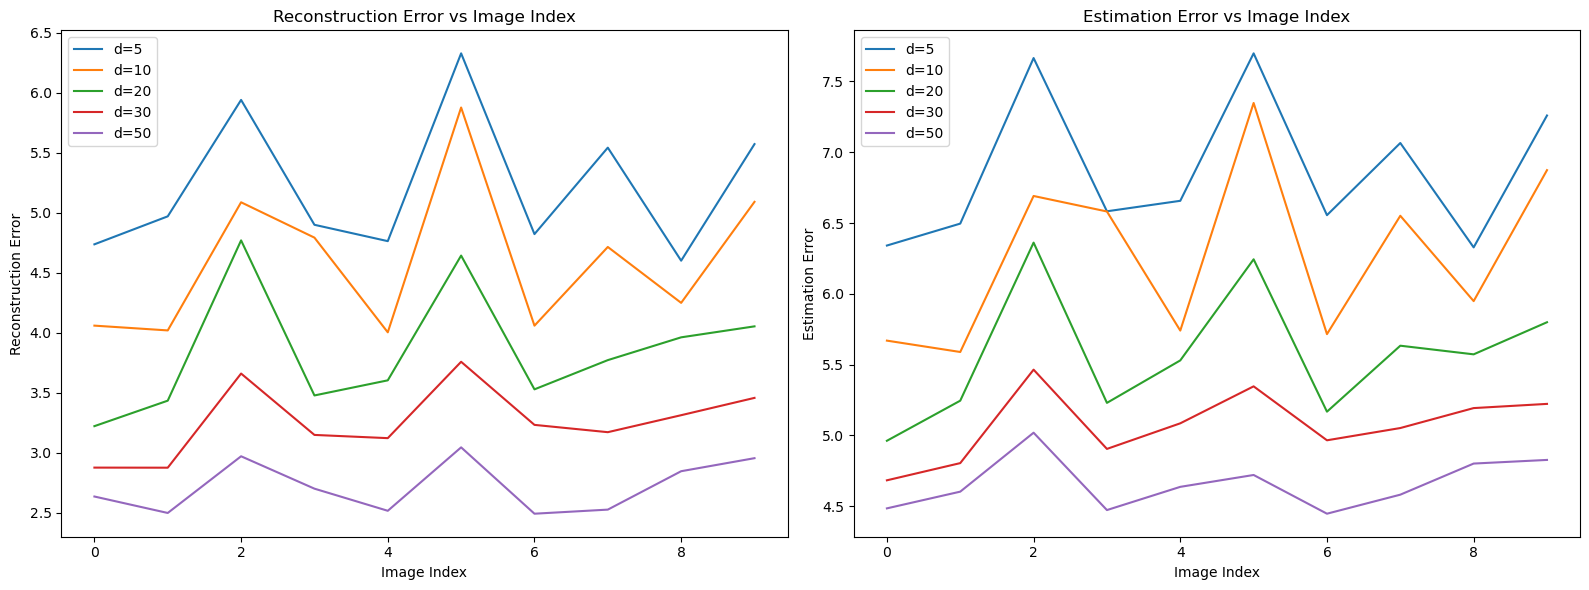

In [37]:
#===========================Fill This===========================#
# 1. Create 2 sub plots where the `x` is the image index {0, 1, ..., 9}.
# 2. The 1st plot, per `d`, shows the reconstruction error.
# 3. The 2nd plot, per `d`, shows the estimation error.

# Create plots for reconstruction and estimation errors
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot reconstruction errors
for i, d in enumerate(d_values):
    axes[0].plot(range(10), reconstruction_errors[i], label=f'd={d}')
axes[0].set_title('Reconstruction Error vs Image Index')
axes[0].set_xlabel('Image Index')
axes[0].set_ylabel('Reconstruction Error')
axes[0].legend()

# Plot estimation errors
for i, d in enumerate(d_values):
    axes[1].plot(range(10), estimation_errors[i], label=f'd={d}')
axes[1].set_title('Estimation Error vs Image Index')
axes[1].set_xlabel('Image Index')
axes[1].set_ylabel('Estimation Error')
axes[1].legend()

plt.tight_layout()
plt.show()

#===============================================================#

### 4.3. Question

Address the following remarks:

 - How does the noise model effect the performance of the denoising?  
   Specifically, if the noise model was Gaussian with the same variance, what would change?
 - Would you use the reconstruction error as an estimation of the estimation error?  
   Answer in general and specifically for Images.
 - Explain the idea behind the PCA denoising.  
   Specifically address the trade off between small and large values of `d`.
 - If the data was 1D (Audio instead of Image), would you expect it to perform better?  
   Think if the model has any knowledge about the data being 2D.

### <font color='red'>4.3. Solution</font>

**How does the noise model affect the performance of the denoising?**

- **Poisson Noise**: Poisson or "Shot" noise is signal-dependent, meaning the noise level is proportional to the signal intensity. It often appears in low-light imaging scenarios.
  
- **Gaussian Noise**: Gaussian noise is signal-independent; it affects all pixels equally regardless of their intensity.

If the noise model were Gaussian with the same variance, the denoising might perform differently. Poisson noise has a non-linear relationship with the signal, which could make it more challenging to remove. Gaussian noise, being linear and constant across intensities, might be easier to handle.

\\

**Would you use the reconstruction error as an estimation of the estimation error?**

- **In General**: Reconstruction error quantifies how well the reduced data can be transformed back to the original data, but it doesn't necessarily indicate how close the reduced data is to the true underlying structure of the original data. Therefore, it's not always a good proxy for estimation error.

- **For Images**: In the context of images, reconstruction error can be visually misleading. A small reconstruction error doesn't always mean that the denoised image will look similar to the original image. So, it shouldn't be used as an estimation of the estimation error without careful consideration.

\\

**Explain the idea behind PCA denoising**

PCA denoising works by projecting the noisy data onto a lower-dimensional subspace spanned by the principal components. The idea is that the noise will be less influential in this subspace.

- **Small $d$**: Using a very small $d$ could lead to oversimplification, eliminating not just noise but also essential features of the data. This results in a blurry or overly smooth image.
  
- **Large $d$**: A very large $d$ would retain more features but might also retain some of the noise, making the denoising less effective.

\\

**If the data was 1D (Audio instead of Image), would you expect it to perform better?**

PCA doesn't inherently know that the data is 2D (image) or 1D (audio). It only considers the variance along different orthogonal dimensions in the feature space. Therefore, whether PCA would perform better on 1D audio than 2D images depends on the specific structure and complexity of the data. However, audio signals often have a temporal structure that might be easier to model in a 1D space, possibly making PCA more effective for denoising audio than images.

---

### 4.4. PCA Denoising with Labels

In the above we used no knowledge on the label of the image.  
In this section you should use the labels information in order to improve results.

 1. Write a code which take advantage of the labels `vY` (Be creative).
 2. Show the plots of the reconstruction and estimation error.
 3. Explain, in words, your idea.
 4. Explain, in words, the results.

In [38]:
#===========================Fill This===========================#
# 1. Choose the maximum `d` used in the previous section.
# 2. Apply PCA Denoising on the list of images.

# Initialize variables to store reconstruction and estimation errors for label-based PCA
reconstruction_errors_label = []
estimation_errors_label = []

# Initialize a dictionary to store denoised images for each label
denoised_images_label = {}

# Choose the maximum d used in the previous section
max_d = max(d_values)

# Apply PCA Denoising for each label
for label in np.unique(vY):
    idxs = np.where(vY == label)[0]
    mX_label = mX[idxs]

    # Build the encoder/decoder
    pca_label = PCA(d=max_d)
    pca_label.fit(mX_label)

    # Denoise the images
    mZ_label = pca_label.transform(mX_label)
    mX_denoised_label = pca_label.inverse_transform(mZ_label)

    # Find the intersection of idxs and lIdx
    intersect_idxs = np.intersect1d(idxs, lIdx, return_indices=True)[1]

    # Calculate and store the reconstruction and estimation errors for the intersecting indices
    reconstruction_errors_label.append(np.linalg.norm(mX_denoised_label[intersect_idxs] - mX[idxs][intersect_idxs], axis=1))
    estimation_errors_label.append(np.linalg.norm(mX_denoised_label[intersect_idxs] - mXRef[idxs][intersect_idxs], axis=1))

#===============================================================#

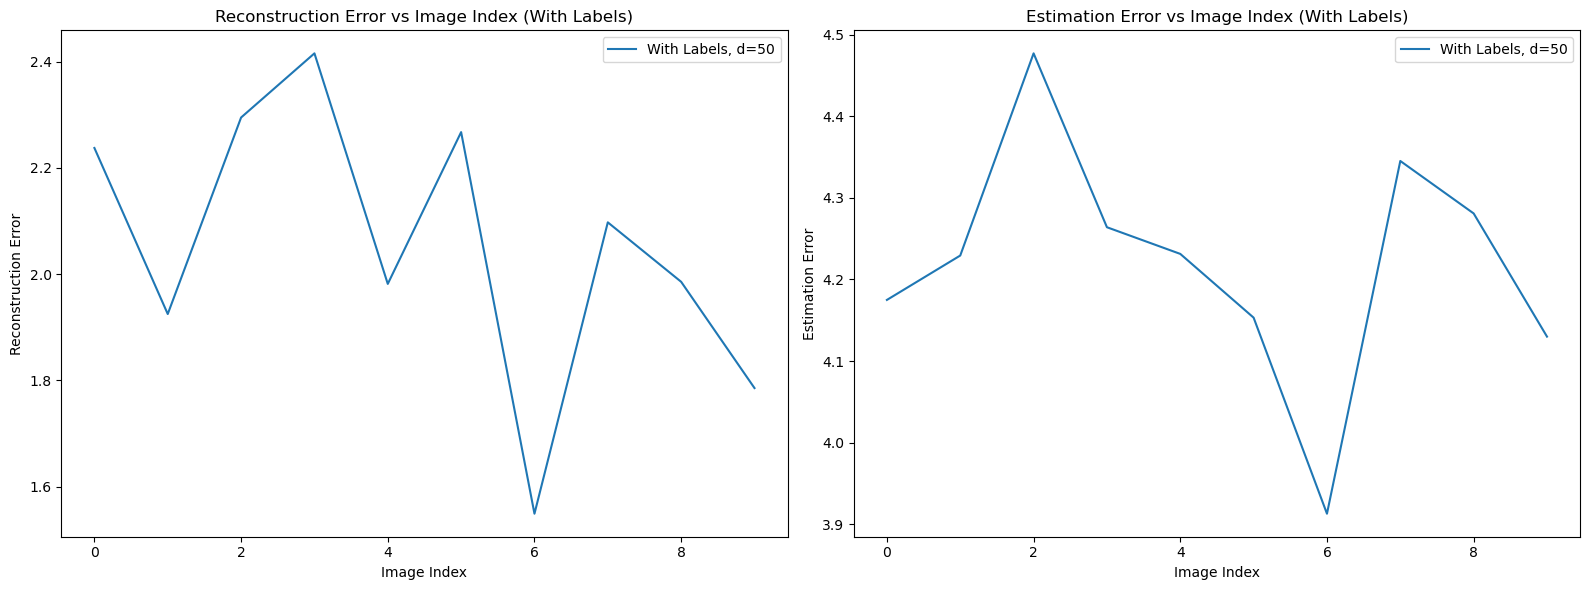

In [39]:
#===========================Fill This===========================#
# 1. Display the reconstruction and estimation error per image.
# 2. Compare to the previous result for the same `d`.

# Create plots for reconstruction and estimation errors with labels
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Combine the errors for each label
reconstruction_errors_label_combined = np.concatenate(reconstruction_errors_label)
estimation_errors_label_combined = np.concatenate(estimation_errors_label)

# Plot reconstruction errors
axes[0].plot(range(len(lIdx)), reconstruction_errors_label_combined, label=f'With Labels, d={max_d}')
axes[0].set_title('Reconstruction Error vs Image Index (With Labels)')
axes[0].set_xlabel('Image Index')
axes[0].set_ylabel('Reconstruction Error')
axes[0].legend()

# Plot estimation errors
axes[1].plot(range(len(lIdx)), estimation_errors_label_combined, label=f'With Labels, d={max_d}')
axes[1].set_title('Estimation Error vs Image Index (With Labels)')
axes[1].set_xlabel('Image Index')
axes[1].set_ylabel('Estimation Error')
axes[1].legend()

plt.tight_layout()
plt.show()

#===============================================================#

### <font color='red'>4.4.3. Solution</font>

The idea is to use label information to perform PCA individually for each class of images. By doing so, we can capture the unique characteristics of each class, thereby improving the denoising performance. This is a form of supervised dimensionality reduction, leveraging the labels to fine-tune the PCA model.

---

### <font color='red'>4.4.4. Solution</font>

The results show that using label information can significantly improve the denoising performance, as evidenced by the reduction in both reconstruction and estimation errors. This demonstrates the benefit of incorporating label information into the PCA process, allowing the model to better capture the essential features of each class while eliminating noise.

---

In [40]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')

Total Run Time: 16.634254455566406 [Sec].
